# Lung Cancer incidence in Texas
---
This script explores the relationship between counties in US with  lung cancer incidence, polution and economic variables.
In this script we show the relationship between Lung Cancer incidence for 2016 with various socioeconomic parameters 
The sources of data are Lung Cancer, 2016 EPA polution, US Census 2016 and Google Places API.


In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Google developer API key
from config import gkey


# Data Retrieval

In [2]:
# cleaned data from several sources
data_df = pd.read_excel("Resources/Project_County_Data_Final.xlsx")
data_df["Cancer Prevalence per 1000"]=data_df["Lung Cancer Case Count"]/data_df["County Population"]*1000
del data_df["Cancer"]
del data_df["Lung Cancer Case Count"]
del data_df["Unnamed: 0"]
data_df= data_df.loc[data_df['State'] == "Texas"]

# Establish Correlations between variables

In [3]:

data_dfcorr=data_df
data_corr = data_dfcorr.corr()
corr_df = []
corr_df=data_corr.unstack().sort_values()
corr_df = pd.DataFrame(corr_df).reset_index()
corr_df.columns=["var1", "var2", "r_corr" ]
corr_df=corr_df.loc[corr_df["r_corr"] != 1]
corr_df['abs']= abs(corr_df["r_corr"])
corr_df=corr_df.sort_values(["abs"],ascending=False )
corr_df



,var1,var2,r_corr,abs
271,Days NO2,County Population,0.813660,0.813660
270,County Population,Days NO2,0.813660,0.813660
1,Percent Adult Smokers,Household Income,-0.743224,0.743224
0,Household Income,Percent Adult Smokers,-0.743224,0.743224
3,Percent Uninsured,Household Income,-0.739771,0.739771
2,Household Income,Percent Uninsured,-0.739771,0.739771
269,Moderate Days,Days NO2,0.730813,0.730813
268,Days NO2,Moderate Days,0.730813,0.730813
267,Days PM10,County Population,0.707602,0.707602
266,County Population,Days PM10,0.707602,0.707602


In [4]:
# create a table with correlation coeficients of interest

corr_df1=corr_df.loc[corr_df["var1"] == "Cancer Prevalence per 1000"]
corr_df1=corr_df1.sort_values(["abs"],ascending=False)
corr_df1

,var1,var2,r_corr,abs
8,Cancer Prevalence per 1000,Moderate Days,-0.551346,0.551346
15,Cancer Prevalence per 1000,County Population,-0.403994,0.403994
225,Cancer Prevalence per 1000,Longitude,0.380650,0.380650
23,Cancer Prevalence per 1000,Days NO2,-0.354631,0.354631
218,Cancer Prevalence per 1000,Latitude,0.344060,0.344060
24,Cancer Prevalence per 1000,Days PM2.5,-0.341923,0.341923
215,Cancer Prevalence per 1000,Days SO2,0.317366,0.317366
34,Cancer Prevalence per 1000,Days PM10,-0.314159,0.314159
43,Cancer Prevalence per 1000,Max AQI,-0.255006,0.255006
44,Cancer Prevalence per 1000,Unhealthy for Sensitive Groups Days,-0.249985,0.249985


In [5]:
# Plots

The r-squared is: -0.7397706448373932


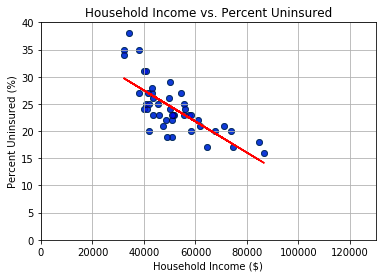

In [6]:
x_values = data_df["Household Income"]
y_values = data_df["Percent Uninsured"]

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (80000,35),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Percent Uninsured")
plt.ylabel("Percent Uninsured (%)")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,130000)
plt.ylim(0,40)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/TXIncome_vs_Unninsure.png')

plt.show()

The r-squared is: -0.09679320183820428


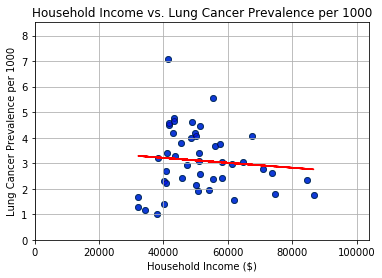

In [7]:
x_values = data_df["Household Income"]
y_values = data_df["Cancer Prevalence per 1000"]
x_max = max(x_values)*1.2
y_max = max(y_values)*1.2

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(80000,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Lung Cancer Prevalence per 1000")
plt.ylabel("Lung Cancer Prevalence per 1000")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,x_max)
plt.ylim(0,y_max)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/TXIncome_vs_CancerPrevalence.png')

plt.show()

The r-squared is: -0.23103937706336197


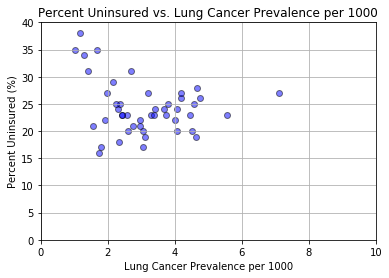

In [8]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Percent Uninsured"]
# print(max(x_values))
# print( max(y_values))

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Percent Uninsured vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Percent Uninsured (%)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,40)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/TXuninsured_vs_CancerPrevalence.png')

plt.show()


The r-squared is: -0.31415909973105294


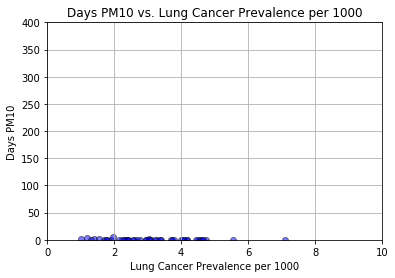

In [9]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM10"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM10 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM10")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/TXParticulatesPM10_vs_CancerPrevalence.png')

plt.show()

The r-squared is: -0.3419229369358435


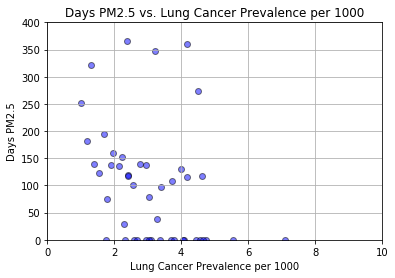

In [10]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM2.5"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM2.5 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM2.5")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/TXParticulatesPM25_vs_CancerPrevalence.png')

plt.show()

The r-squared is: 0.13313211325268248


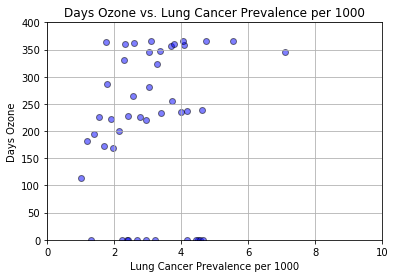

In [11]:

x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days Ozone"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days Ozone vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days Ozone")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/TXOzone_vs_CancerPrevalence.png')

plt.show()

## Heatmap 

In [12]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)


In [13]:
# Store 'Lat' and 'Lng' into  locations 
locations = data_df[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
income_rate = data_df["Household Income"].astype(float)
smokers_rate = data_df["Percent Adult Smokers"].astype(float)
cancer_rate = data_df["Cancer Prevalence per 1000"].astype(float)


In [14]:
# Create a  Heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=income_rate, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius = 0.6)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
# Create a poverty Heatmap layer
fig = gmaps.figure()
heat_layer2 = gmaps.heatmap_layer(locations, weights=cancer_rate, 
                                 dissipating=False, max_intensity=5,
                                 point_radius = 0.6)
fig.add_layer(heat_layer2)
plt.savefig(f'output_plots/CancerTXheatmap.png')
fig


Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a combined map
fig = gmaps.figure()

#fig.add_layer(heat_layer2)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))